In [5]:
import numpy as np
from py_pol.jones_matrix import Jones_matrix
from py_pol.jones_vector import Jones_vector
from py_pol.mueller import Mueller

from py_pol import degrees

import matplotlib.pyplot as plt

from py_aocg.SLM_system import cargar_Jones_SLM, SLM_system_field
from py_aocg.ifta.algorithms import distances_scalar

## Cargar Matrices de polarización de Holoeye

In [26]:
S_incident=Jones_vector('incident')
S_incident.circular_light(intensity=2)

Jslm=cargar_Jones_SLM(type="Jones")

In [27]:
Jslm = cargar_Jones_SLM()
print(Jslm.shape)

[256]


In [28]:
# angles_amplitude = [1.63644037, 5.11863528, 2.7111866,  1.68529409]
angles_phase     = [4.8175487,  0.01581232, 1.75758677, 1.15229228]
angles_spiral    = [0.85421954, 2.13133493, 4.81888539, 4.7449518 ]

- amplitud:       best cost: 0.21199592361665928, best pos: [1.63644037 5.11863528 2.7111866  1.68529409]
- fase    best cost: 0.21164481754171188, best pos: [1.61038889 1.947723   2.66072842 4.8141105 ]
- espiral:    best cost: 0.1860612974896374, best pos: [0.85421954 2.13133493 4.81888539 4.7449518 ]

Text(0.5, 0.98, 'amplitude')

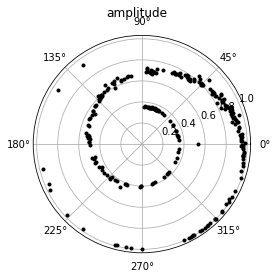

In [33]:
u_fab_amplitude, u_fab_phase, fields=SLM_system_field(angles_spiral, Jslm, E0=S_incident)
u_fab = u_fab_amplitude*np.exp(1j*2*u_fab_phase)

plt.polar(2*u_fab_phase,u_fab_amplitude, 'k.')
plt.suptitle('amplitude')

In [34]:
fields.M.shape

(2, 256)

Text(0.5, 0.98, 'amplitude')

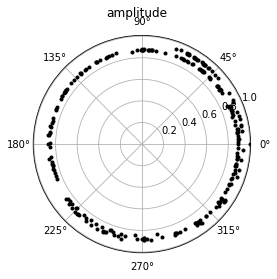

In [35]:
u_fab_amplitude, u_fab_phase, fields=SLM_system_field(angles_phase, Jslm, E0=S_incident)
u_fab = u_fab_amplitude*np.exp(1j*2*u_fab_phase)

plt.polar(2*u_fab_phase,u_fab_amplitude, 'k.')
plt.suptitle('amplitude')

## Objetivo

In [36]:
from diffractio import um, mm, nm, np, sp, plt, degrees
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.utils_drawing import draw_several_fields

In [37]:
num_x=128
num_y=128
DOE_size=40*um

x=np.linspace(-DOE_size/2,DOE_size/2, num_x)
y=np.linspace(-DOE_size/2,DOE_size/2, num_y)
wavelength=0.6328*um

In [38]:
source=Scalar_source_XY(x,y,wavelength)
source.plane_wave()

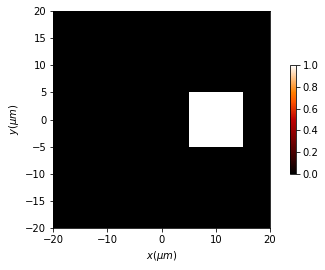

In [39]:
target=Scalar_mask_XY(x,y,wavelength)
target.square(r0=(10,0), size=(10,10), angle=0)
target.draw(has_colorbar='vertical');

## IFTA fase estándar

Se realiza una optimización de distancias con IFTA estándard de fase

In [44]:
from py_aocg.ifta.algorithms import GS_scalar_Fresnel
from py_aocg.ifta.algorithms import GS_scalar_far, GS_scalar_Fresnel, GS_far_algorithm_deprecated, GS_Fresnel_algorithm_deprecated

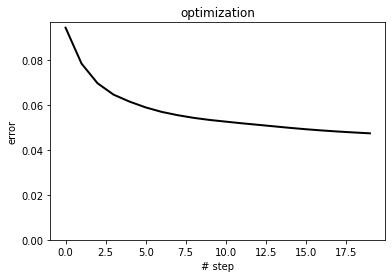

In [45]:
num_steps=20

DOE_far_new, mask_final, errors = GS_scalar_far(source,target, kind='phase', is_binary=False, phase=np.pi, num_steps=num_steps, has_draw=True)

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x20e1380f190>)

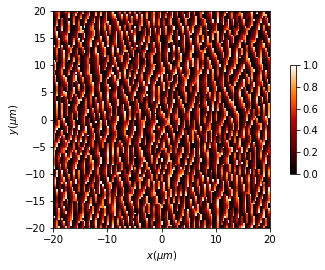

In [46]:
mask_final.draw(has_colorbar='vertical')

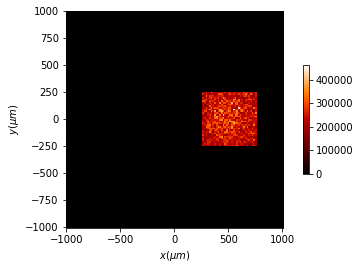

In [47]:
u_far_new = DOE_far_new.fft(z=1*mm,new_field=True, remove0=True)
u_far_new.draw(has_colorbar='vertical', logarithm=False );